<a href="https://colab.research.google.com/github/vyzkhd/Deep-Learning-Projects/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [14]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Projects/'

Mounted at /content/gdrive


In [0]:
path = Path(base_dir+'data/Diabetes')
path.mkdir(parents=True,exist_ok=True)

In [20]:
path.ls()

[PosixPath('/content/gdrive/My Drive/Projects/data/Diabetes/diabetes.csv')]

In [0]:
df = pd.read_csv(path/'diabetes.csv')

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
for col in df.columns:
  missing_rows = df[df[col]==0].shape[0]
  print(col+' : '+str(missing_rows))

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [0]:
df.Glucose = df.Glucose.replace(0,np.nan)

In [0]:
df.BloodPressure = df.BloodPressure.replace(0,np.nan)
df.Insulin = df.Insulin.replace(0,np.nan)
df.BMI = df.BMI.replace(0,np.nan)
df.SkinThickness = df.SkinThickness.replace(0,np.nan)

In [0]:
df.Glucose = df.Glucose.fillna(df.Glucose.mean())
df.BloodPressure = df.BloodPressure.fillna(df.BloodPressure.mean())
df.Insulin = df.Insulin.fillna(df.Insulin.mean())
df.BMI = df.BMI.fillna(df.BMI.mean())
df.SkinThickness = df.SkinThickness.fillna(df.SkinThickness.mean())

In [33]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
664,6,115.0,60.000000,39.00000,155.548223,33.7,0.245,40,1
96,2,92.0,62.000000,28.00000,155.548223,31.6,0.130,24,0
137,0,93.0,60.000000,25.00000,92.000000,28.7,0.532,22,0
223,7,142.0,60.000000,33.00000,190.000000,28.8,0.687,61,0
363,4,146.0,78.000000,29.15342,155.548223,38.5,0.520,67,1
519,6,129.0,90.000000,7.00000,326.000000,19.6,0.582,60,0
587,6,103.0,66.000000,29.15342,155.548223,24.3,0.249,29,0
710,3,158.0,64.000000,13.00000,387.000000,31.2,0.295,24,0
286,5,155.0,84.000000,44.00000,545.000000,38.7,0.619,34,0
643,4,90.0,72.405184,29.15342,155.548223,28.0,0.610,31,0


In [0]:
from sklearn import preprocessing
df2 = preprocessing.scale(df)

In [0]:
df2 = pd.DataFrame(df2,columns=df.columns)

In [47]:
df2.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
39,0.046014,-0.351352,-0.033518,2.031433e+00,6.055591e-01,0.675703,2.772843,1.936522,1
642,0.639947,0.832231,0.628269,8.087936e-16,-3.345079e-16,-0.430447,-0.887541,1.425995,1
104,-0.547919,-1.206162,-0.612582,8.087936e-16,-3.345079e-16,1.039569,1.383588,-0.531023,0
289,0.342981,-0.449984,-0.033518,1.576123e+00,-9.480083e-01,0.530157,-0.630831,-0.020496,0
676,1.530847,1.128126,1.124610,8.087936e-16,-3.345079e-16,-1.114514,-0.730495,1.681259,1
270,1.827813,-0.680125,1.124610,8.931573e-01,-3.345079e-16,1.912845,2.005732,0.404942,1
448,-1.141852,-0.581493,-0.695306,8.931573e-01,-1.077472e+00,0.166292,0.115138,-0.956462,1
636,0.342981,-0.581493,0.131929,8.087936e-16,-3.345079e-16,-0.532330,-0.963044,1.255820,0
219,0.342981,-0.318475,-0.529859,8.087936e-16,-3.345079e-16,0.777585,-0.636871,0.660206,1
664,0.639947,-0.219843,-1.026200,1.120812e+00,-3.345079e-16,0.180846,-0.685193,0.575118,1


In [0]:
df2.Outcome = df.Outcome

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
y = df2.Outcome
X = df2.drop(['Outcome'],axis=1)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

In [46]:
from keras.models import Sequential

Using TensorFlow backend.


In [50]:
model = Sequential()

W0802 06:57:01.810088 140165700573056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
from keras.layers import Dense

In [52]:
model.add(Dense(32,activation='relu',input_dim=8))

W0802 07:11:10.842998 140165700573056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 07:11:10.860547 140165700573056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.add(Dense(16,activation='relu'))

In [0]:
model.add(Dense(1,activation='sigmoid'))

In [55]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

W0802 07:26:01.712546 140165700573056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 07:26:01.746268 140165700573056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0802 07:26:01.756022 140165700573056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [56]:
model.fit(X_train,y_train,epochs=200)

W0802 07:26:48.391870 140165700573056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/200
491/491 [==============================] - 9s 18ms/step - loss: 0.6058 - acc: 0.7475
Epoch 2/200
491/491 [==============================] - 0s 132us/step - loss: 0.5665 - acc: 0.7536
Epoch 3/200
491/491 [==============================] - 0s 136us/step - loss: 0.5342 - acc: 0.7556
Epoch 4/200
491/491 [==============================] - 0s 166us/step - loss: 0.5090 - acc: 0.7597
Epoch 5/200
491/491 [==============================] - 0s 149us/step - loss: 0.4907 - acc: 0.7556
Epoch 6/200
491/491 [==============================] - 0s 142us/step - loss: 0.4779 - acc: 0.7597
Epoch 7/200
491/491 [==============================] - 0s 146us/step - loss: 0.4681 - acc: 0.7576
Epoch 8/200
491/491 [==============================] - 0s 156us/step - loss: 0.4611 - acc: 0.7617
Epoch 9/200
491/491 [==============================] - 0s 158us/step - loss: 0.4556 - acc: 0.7719
Epoch 10/200
491/491 [==============================] - 0s 169us/step - loss: 0.4506 - acc: 0.7699
Epoch 11/200
491/491

In [57]:
scores = model.evaluate(X_train,y_train)
print("training accuracy: %.2f%%\n" % (scores[1]*100))

491/491 [==============================] - 0s 128us/step
training accuracy: 91.24%



In [58]:
scores = model.evaluate(X_test,y_test)
print("testing accuracy: %.2f%%\n" % (scores[1]*100))

154/154 [==============================] - 0s 118us/step
testing accuracy: 77.92%



In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(33.0, 0.5, 'Actual')

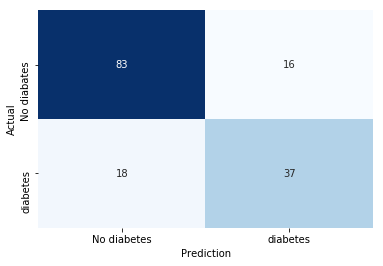

In [61]:
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(c_matrix,annot=True,xticklabels=['No diabetes','diabetes'],yticklabels=['No diabates','diabetes'],cbar=False,cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [0]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [0]:
y_test_pred_probs = model.predict(X_test)

In [0]:
FPR,TPR,_ = roc_curve(y_test,y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

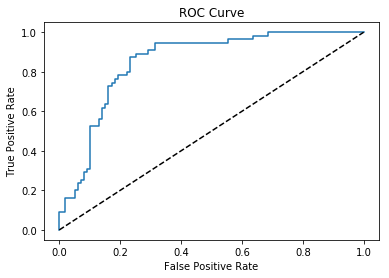

In [66]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')